In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import skimage
import torch
import torchvision

In [2]:
root = "/cluster/tufts/hugheslab/eharve06/MNIST"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=1),
])
train_dataset = torchvision.datasets.MNIST(root=root, train=True, transform=transform, download=True)
train_labels = np.array([label for image, label in train_dataset])
train_pixels = np.array([image.reshape(1) for image, label in train_dataset])

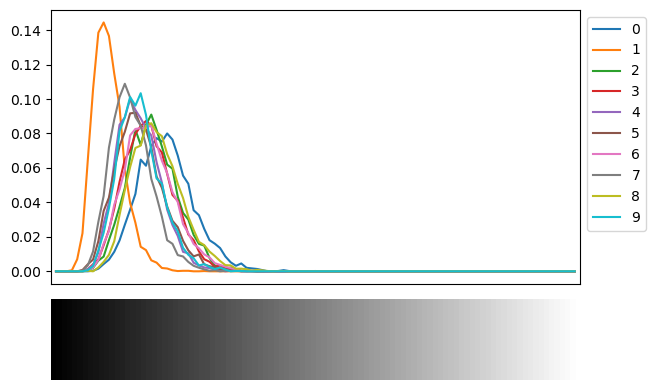

In [3]:
num_bins = 100
pixels = np.array([i for i in range(num_bins)])

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
axs = [ax1, ax2]

for i in range(10):
        
    counts, bin_edges = np.histogram(100 * train_pixels[train_labels == i], bins=pixels)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axs[0].plot(bin_centers, counts / sum(counts), label=f"{i}")

axs[0].set_xticks([])
    
axs[1].imshow([pixels], aspect="auto", cmap="gray")
axs[1].axis("off")

fig.tight_layout()
axs[0].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
fig.savefig("MNIST_distribution.pdf")
plt.show()


In [4]:
root = "/cluster/tufts/hugheslab/eharve06/CIFAR-10"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=1),
])
train_dataset = torchvision.datasets.CIFAR10(root=root, train=True, transform=transform, download=True)
train_labels = np.array([label for image, label in train_dataset])
train_rgbs = np.array([image.reshape(3) for image, label in train_dataset],)

Files already downloaded and verified


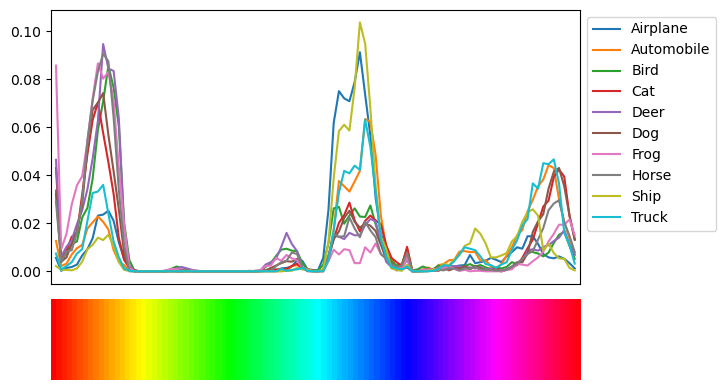

In [7]:
num_bins = 100
rgbs = np.array([colorsys.hsv_to_rgb(i/num_bins, 1.0, 1.0) for i in range(num_bins)])

dists = np.linalg.norm(train_rgbs[:, None, :] - rgbs[None, :, :], axis=2)
closest_idx = np.argmin(dists, axis=1)

train_labs = skimage.color.rgb2lab(train_rgbs)
labs = skimage.color.rgb2lab(rgbs)

dists = skimage.color.deltaE_ciede2000(train_labs[:, None, :], labs[None, :, :])
closest_idx = np.argmin(dists, axis=1)

labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF"]

fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
axs = [ax1, ax2]

for i in range(10):
        
    counts, bin_edges = np.histogram(closest_idx[train_labels==i], bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axs[0].plot(bin_centers, counts / sum(counts), label=f"{labels[i]}")
        
axs[0].set_xticks([])

axs[1].imshow([rgbs], aspect="auto")
axs[1].axis("off")

fig.tight_layout()
axs[0].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
fig.savefig("CIFAR-10_distribution.pdf")
plt.show()
